# Transformação simbólico-numérico

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados_cmc = pd.read_csv('cmc.csv')
dados_cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education             1473 non-null   int64
 2   husband_education          1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   wife_religion              1473 non-null   int64
 5   wife_working_now           1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   std_living_index           1473 non-null   int64
 8   media_exposure             1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [3]:
oneHotHusbandOcc = pd.get_dummies(dados_cmc['husband_occupation'], prefix='husband_occupation')
oneHotHusbandOcc

,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1468,False,True,False,False
1469,True,False,False,False
1470,True,False,False,False
1471,False,True,False,False


In [4]:
dados_cmc = pd.concat([dados_cmc, oneHotHusbandOcc], axis=1)
dados_cmc = dados_cmc.drop('husband_occupation', axis=1)
dados_cmc

,wife_age,wife_education,husband_education,num_children,wife_religion,wife_working_now,std_living_index,media_exposure,contraceptive_method_used,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4
0,24,2,3,3,1,1,3,0,1,False,True,False,False
1,45,1,3,10,1,1,4,0,1,False,False,True,False
2,43,2,3,7,1,1,4,0,1,False,False,True,False
3,42,3,2,9,1,1,3,0,1,False,False,True,False
4,36,3,3,8,1,1,2,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,4,0,3,False,True,False,False
1469,33,4,4,3,1,1,4,0,3,True,False,False,False
1470,39,3,3,8,1,0,4,0,3,True,False,False,False
1471,33,3,3,4,1,0,2,0,3,False,True,False,False


# Transformação numérico-simbolica

In [5]:
wife_age_discretizada = pd.cut(dados_cmc['wife_age'], bins=10, labels=range(10))

wife_age_discretizada.value_counts()

,count
wife_age,
3,250
6,186
2,185
4,174
5,167
1,135
9,118
8,114
7,108


In [6]:
dados_cmc['wife_age'] = wife_age_discretizada
dados_cmc['wife_age']

,wife_age
0,2
1,8
2,8
3,7
4,6
...,...
1468,5
1469,5
1470,6
1471,5


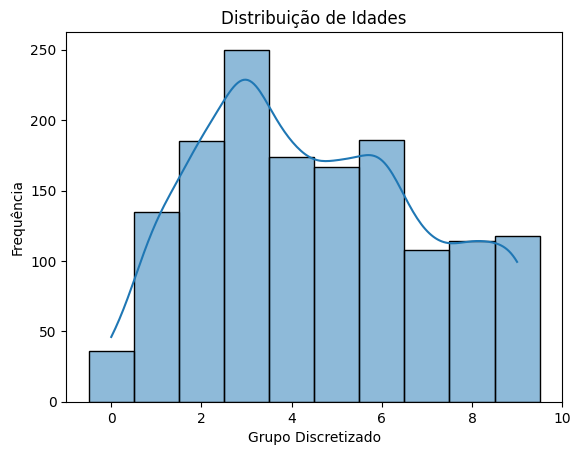

In [8]:
sns.histplot(dados_cmc['wife_age'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Grupo Discretizado')
plt.ylabel('Frequência')
plt.show()

# Normalização de Dados

In [10]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale

dados = pd.read_csv('breast_cancer_custom.csv')
dados = dados.drop(['sample_id', 'diagnosis'], axis=1)
dados.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
1,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,16.41,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362
2,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
3,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397
4,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675


In [12]:
dados_reescalados = dados.copy()
dados_reescalados = dados_reescalados.apply(minmax_scale)
dados_reescalados

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.443419,0.459249,0.450625,0.295610,0.404351,0.399730,0.424321,0.436034,0.563131,0.257372,...,0.407328,0.506663,0.392898,0.240808,0.464439,0.426124,0.566054,0.772509,0.642421,0.269579
1,0.379526,0.196145,0.370811,0.229480,0.280581,0.276731,0.152413,0.187873,0.414646,0.191870,...,0.301672,0.194296,0.317695,0.153116,0.280195,0.325416,0.271725,0.473883,0.273802,0.187459
2,0.385205,0.235712,0.380001,0.243097,0.326171,0.234648,0.176898,0.202734,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364676,0.277843
3,0.313739,0.516402,0.305853,0.186299,0.381421,0.201613,0.202085,0.223111,0.277273,0.184288,...,0.322305,0.619670,0.289805,0.177276,0.365383,0.162034,0.253115,0.406873,0.214075,0.124164
4,0.302854,0.710517,0.294036,0.175483,0.359484,0.168333,0.066050,0.162227,0.159091,0.214827,...,0.253291,0.788646,0.230490,0.127900,0.303969,0.111389,0.055935,0.266770,0.124384,0.142398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,NaN,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.438290,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.610948,0.561182,0.588316,0.522965,0.518562
605,NaN,0.352384,0.352083,0.229480,NaN,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.325151,0.640991,NaN,0.169092,0.386515,0.285444,0.249840,0.576976,0.316578,0.236587
606,0.433007,0.370984,0.444406,0.277964,0.581114,0.560763,0.403468,0.510934,0.557576,0.497051,...,0.463536,0.518657,0.430251,0.277674,0.711418,0.384211,0.382109,0.712371,0.422038,0.388036
607,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,0.084035,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463


In [13]:
dados_padronizacao = dados.copy()
dados_padronizacao = dados_padronizacao.apply(scale)
dados_padronizacao

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.613412,0.924131,0.682395,0.514165,0.039590,0.794005,1.123867,0.960923,1.270497,-0.109749,...,0.617767,0.846065,0.638340,0.477533,0.346881,1.218329,2.007629,1.623971,2.904650,0.580423
1,0.229233,-0.888191,0.205120,0.068120,-0.920010,0.057870,-0.327979,-0.322045,0.213102,-0.538139,...,0.003045,-1.044945,0.187884,-0.149786,-0.849176,0.599863,0.280745,0.312629,0.039142,-0.060133
2,0.263382,-0.615644,0.260079,0.159961,-0.566547,-0.193995,-0.197244,-0.245216,-0.819117,-0.429320,...,0.284534,-0.894891,0.292294,0.168972,0.672689,0.423499,0.245598,0.120983,0.745558,0.644888
3,-0.166328,1.317810,-0.183312,-0.223139,-0.138192,-0.391705,-0.062756,-0.139865,-0.765168,-0.587728,...,0.123092,1.530185,0.020827,0.023043,-0.296160,-0.403505,0.171555,0.018369,-0.425162,-0.553852
4,-0.231781,2.654921,-0.253973,-0.296097,-0.308274,-0.590884,-0.789117,-0.454633,-1.606768,-0.387996,...,-0.278443,2.553137,-0.334467,-0.330175,-0.694846,-0.714525,-0.985339,-0.596860,-1.122385,-0.411620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,NaN,1.914152,0.175368,-0.005410,1.193069,0.973909,0.908686,0.598875,1.730859,1.073490,...,0.220371,1.830294,0.483216,0.087568,1.474348,2.353375,1.979043,0.815134,1.976041,2.522556
605,NaN,0.188021,0.093136,0.068120,NaN,-0.632372,-0.216636,0.057989,-0.847890,-0.517477,...,0.139650,1.659264,NaN,-0.035504,-0.158978,0.354384,0.152342,0.765336,0.371663,0.323075
606,0.550805,0.316141,0.645205,0.395143,1.410046,1.757774,1.012523,1.348151,1.230934,1.457802,...,0.944790,0.918672,0.862077,0.741260,1.950199,0.960933,0.928385,1.359892,1.191474,1.504420
607,1.598047,0.658572,1.550168,1.714679,0.101883,-0.068797,0.708517,1.147214,-0.862276,-1.243399,...,2.261163,0.821862,2.353656,2.645368,0.762715,0.315655,1.203937,1.835235,-0.245877,-0.442317


# Tecnicas de Amostragem

## Simples

In [15]:
dados = pd.read_csv('breast_cancer_custom.csv')

proporcao = dados['diagnosis'].value_counts(normalize=True)
proporcao

,proportion
diagnosis,
benign,0.617406
malignant,0.382594


In [16]:
amostra_simples = dados.sample(10)
amostra_simples

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
309,925277,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004,benign
89,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,benign
148,903554,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,...,25.80,88.33,559.5,0.1432,0.1773,0.16030,0.06266,0.3049,0.07081,benign
152,855563,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,...,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606,malignant
131,921092,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,...,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938,benign
579,865468,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,...,22.75,91.99,632.1,0.1025,0.2531,0.33080,0.08978,0.2048,0.07628,benign
32,906564,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,18.34,114.10,809.2,0.1312,0.3635,0.32190,0.11080,0.2827,0.09208,benign
166,9010333,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,...,17.70,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431,benign
495,85382601,17.020,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,0.2248,...,32.09,136.10,1344.0,0.1634,0.3559,0.55880,0.18470,0.3530,0.08482,malignant
70,912558,13.700,17.64,87.76,571.1,0.09950,0.07957,0.04548,0.03160,0.1732,...,23.53,95.78,686.5,0.1199,0.1346,0.17420,0.09077,0.2518,0.06960,benign


In [17]:
proporcao_amostrada = amostra_simples['diagnosis'].value_counts(normalize=True)
proporcao_amostrada

,proportion
diagnosis,
benign,0.8
malignant,0.2


## Extratificada

In [22]:
classes = dados['diagnosis'].unique()
tamanho_amostra = 10
qtd_por_classe = round(tamanho_amostra/len(classes))
amostras_por_classe = []
for c in classes:
  indices_c = dados['diagnosis'] == c
  obs_c = dados[indices_c]
  proporcao_c = len(obs_c) / len(dados)
  qnt_c = round(proporcao_c * tamanho_amostra)
  amostra_c = obs_c.sample(qnt_c)
  amostras_por_classe.append(amostra_c)

amostra_extratificada = pd.concat(amostras_por_classe)
amostra_extratificada

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
242,886452,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957,malignant
271,852781,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,27.26,139.90,1403.0,0.1338,0.2117,0.3446,0.14900,0.2341,0.07421,malignant
23,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,malignant
286,916838,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,...,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.16130,0.2549,0.09136,malignant
309,925277,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,benign
322,921644,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,...,32.29,107.40,826.4,0.1060,0.1376,0.1611,0.10950,0.2722,0.06956,benign
186,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,27.26,112.10,828.5,0.1153,0.3429,0.2512,0.13390,0.2534,0.07858,benign
14,912600,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,...,14.20,112.50,854.3,0.1541,0.2979,0.4004,0.14520,0.2557,0.08181,benign
150,868682,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,...,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765,benign
331,912193,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,...,27.87,88.83,547.4,0.1208,0.2279,0.1620,0.05690,0.2406,0.07729,benign


In [23]:
proporcao_extratificada = amostra_extratificada['diagnosis'].value_counts(normalize=True)
proporcao_extratificada

# Perceba que na amostra extratificada o rolê é sempre fiel a proporção dos dados originais :)

,proportion
diagnosis,
benign,0.6
malignant,0.4
